In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

import seaborn
import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff


##############  OFFLINE  ##############
plotly.offline.init_notebook_mode(connected=True)
#to plot offline: ##plotly.offline.iplot##

##############  ONLINE  ##############
#plotly.tools.set_credentials_file(username='arnaurovira23', api_key='7y46ugRJ8Rl6XCkCwBGM')
#to plot online: ##py.iplot##
import plotly.plotly as py

### target dataset

In [2]:
df_target = pd.read_csv('train_lables.txt')
df_target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
print(f' How many unique values are in target column? {len(df_target.heart_disease_present.unique())}')
df_target['heart_disease_present'].unique()

 How many unique values are in target column? 2


array([0, 1])

In [4]:
#Shape of target dataset
num_target = df_target.shape[0]
print(num_target)

180


### train dataset

In [5]:
df_train = pd.read_csv('train_values.txt')
df_train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
df_train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [7]:
#Shape of train dataset
num_train = df_train.shape[0]
print(f' Shpae of dataset train: {num_train}')

 Shpae of dataset train: 180


##### features

In [8]:
features_all = df_train.columns.tolist()
features_all.remove('patient_id')
print(features_all)
print(len(features_all))

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
13


In [9]:
print(f'How many NaN values are in df_train set? {df_train.isnull().sum().sum()}')

How many NaN values are in df_train set? 0


In [10]:
print(f'How many unique values are in thal column? {len(df_train.thal.unique())}')
print(df_train['thal'].unique())

How many unique values are in thal column? 3
['normal' 'reversible_defect' 'fixed_defect']


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


### test dataset

In [12]:
df_test = pd.read_csv('test_values.txt')
df_test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [13]:
#Shape of test dataset
num_test = df_test.shape[0]
print(f' Shpae of dataset test: {num_test}')

 Shpae of dataset test: 90


In [14]:
df_test.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.655556,131.411111,3.211111,0.622222,0.122222,0.966667,250.555556,1.130000,0.655556,53.677778,150.066667,0.355556
std,0.602637,19.552806,0.977206,0.894148,0.329377,0.999438,49.835936,1.193847,0.477849,8.641197,25.351817,0.481363
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,166.000000,0.000000,0.000000,34.000000,71.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,212.250000,0.000000,0.000000,46.250000,136.500000,0.000000
50%,2.000000,130.000000,4.000000,0.000000,0.000000,0.000000,243.500000,0.800000,1.000000,54.000000,156.500000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,274.750000,1.875000,1.000000,60.000000,164.750000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,409.000000,4.000000,1.000000,76.000000,195.000000,1.000000


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.9+ KB


In [16]:
print(f'How many NaN values are in df_test set? {df_test.isnull().sum().sum()}')

How many NaN values are in df_test set? 0


In [17]:
print(f'How many unique values are in thal column? {len(df_test.thal.unique())}')
print(df_test['thal'].unique())

How many unique values are in thal column? 3
['reversible_defect' 'normal' 'fixed_defect']


In [18]:
features_all_test = df_test.columns.tolist()
features_all_test.remove('patient_id')
print(features_all_test)
print(len(features_all_test))

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
13


### merge train & target dataset

In [19]:
df_final = df_train.merge(df_target, on = 'patient_id' , how = 'left')
df_final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [20]:
df_final.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

##### features dataset final

In [21]:
df_final['heart_disease_present'].value_counts()
targets = df_final['heart_disease_present'].unique()
num_targets = len(targets)
print(targets)
print(num_targets)

[0 1]
2


In [22]:
features_num = df_final.select_dtypes(include=['int','float']).columns.to_list()
features_num.remove('heart_disease_present')
print(features_num)
print(len(features_num))

['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
12


In [72]:
df_final['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

### Train vs test comparision

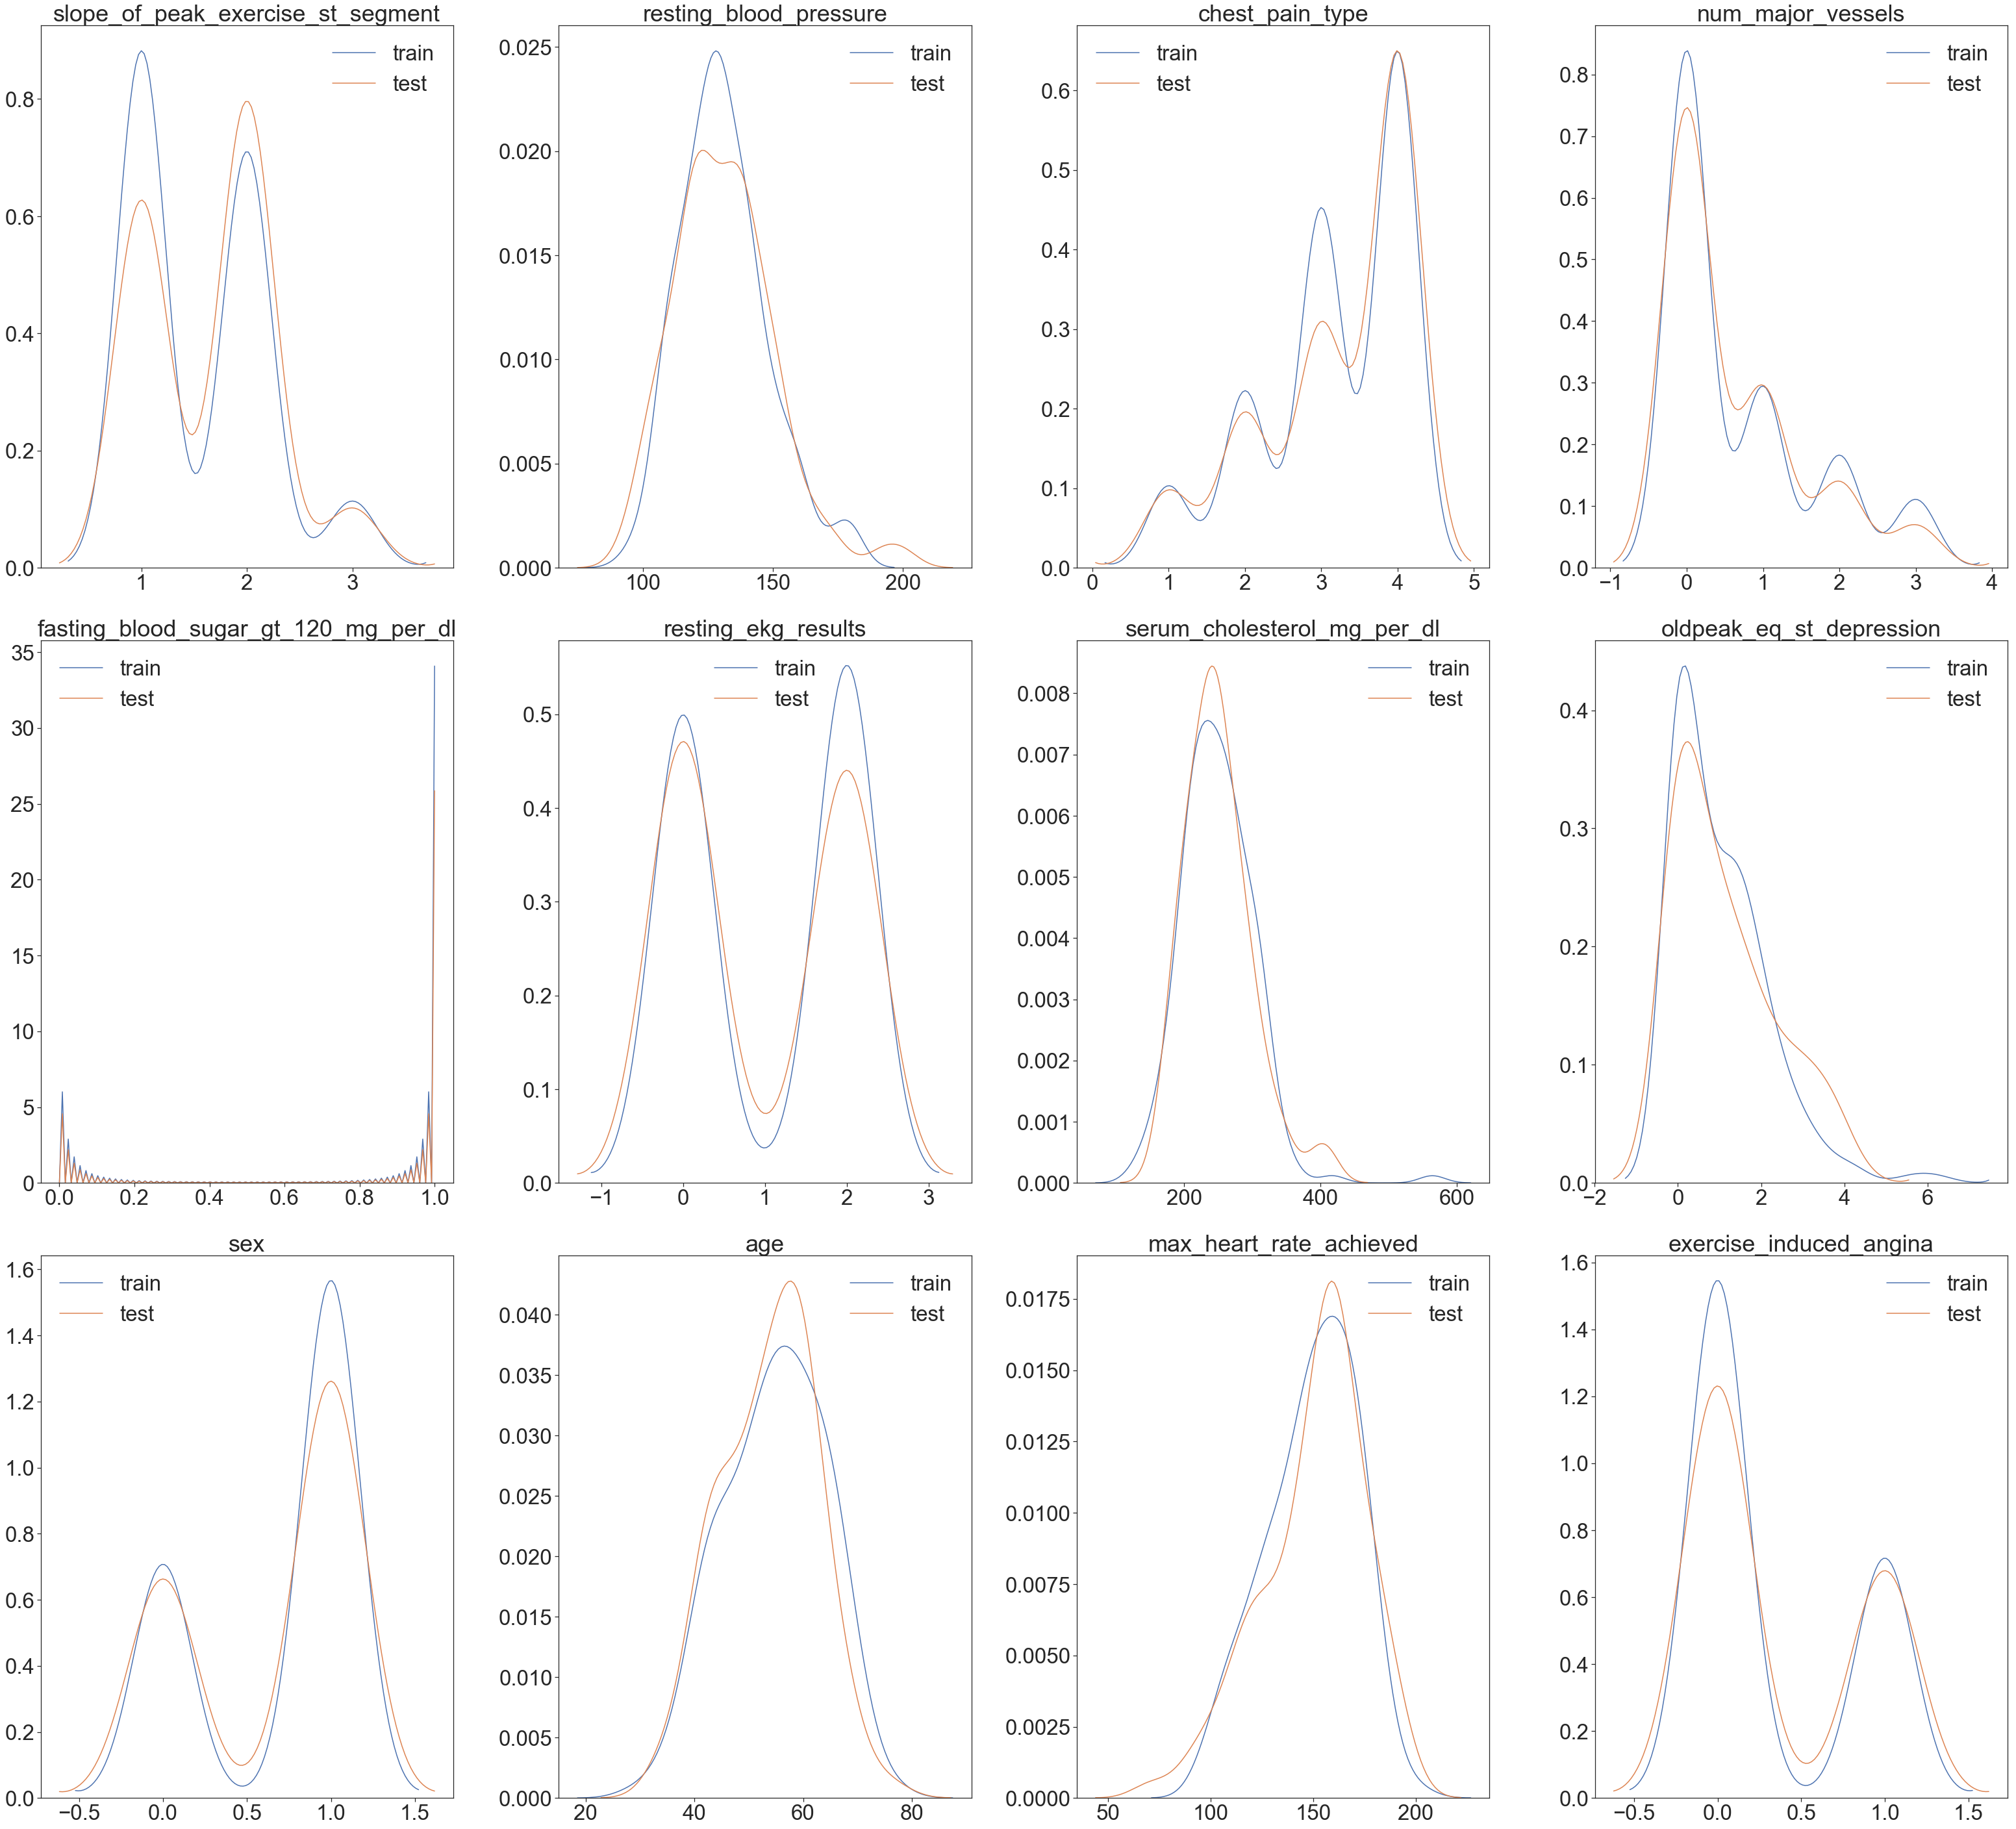

In [265]:
#histograms of train vs test

def compare_dist(ax, feature, i=0):
    sns.kdeplot(df_train[feature], label="train", ax=ax)
    sns.kdeplot(df_test[feature], label="test", ax=ax)


def numeric_tile(plot_func):
    fig, axs = plt.subplots(3, 4, figsize=(44, 40))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_num)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()
    
numeric_tile(compare_dist)

# EDA

In [283]:
features_kde = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']
features_count = ['num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','sex','exercise_induced_angina']

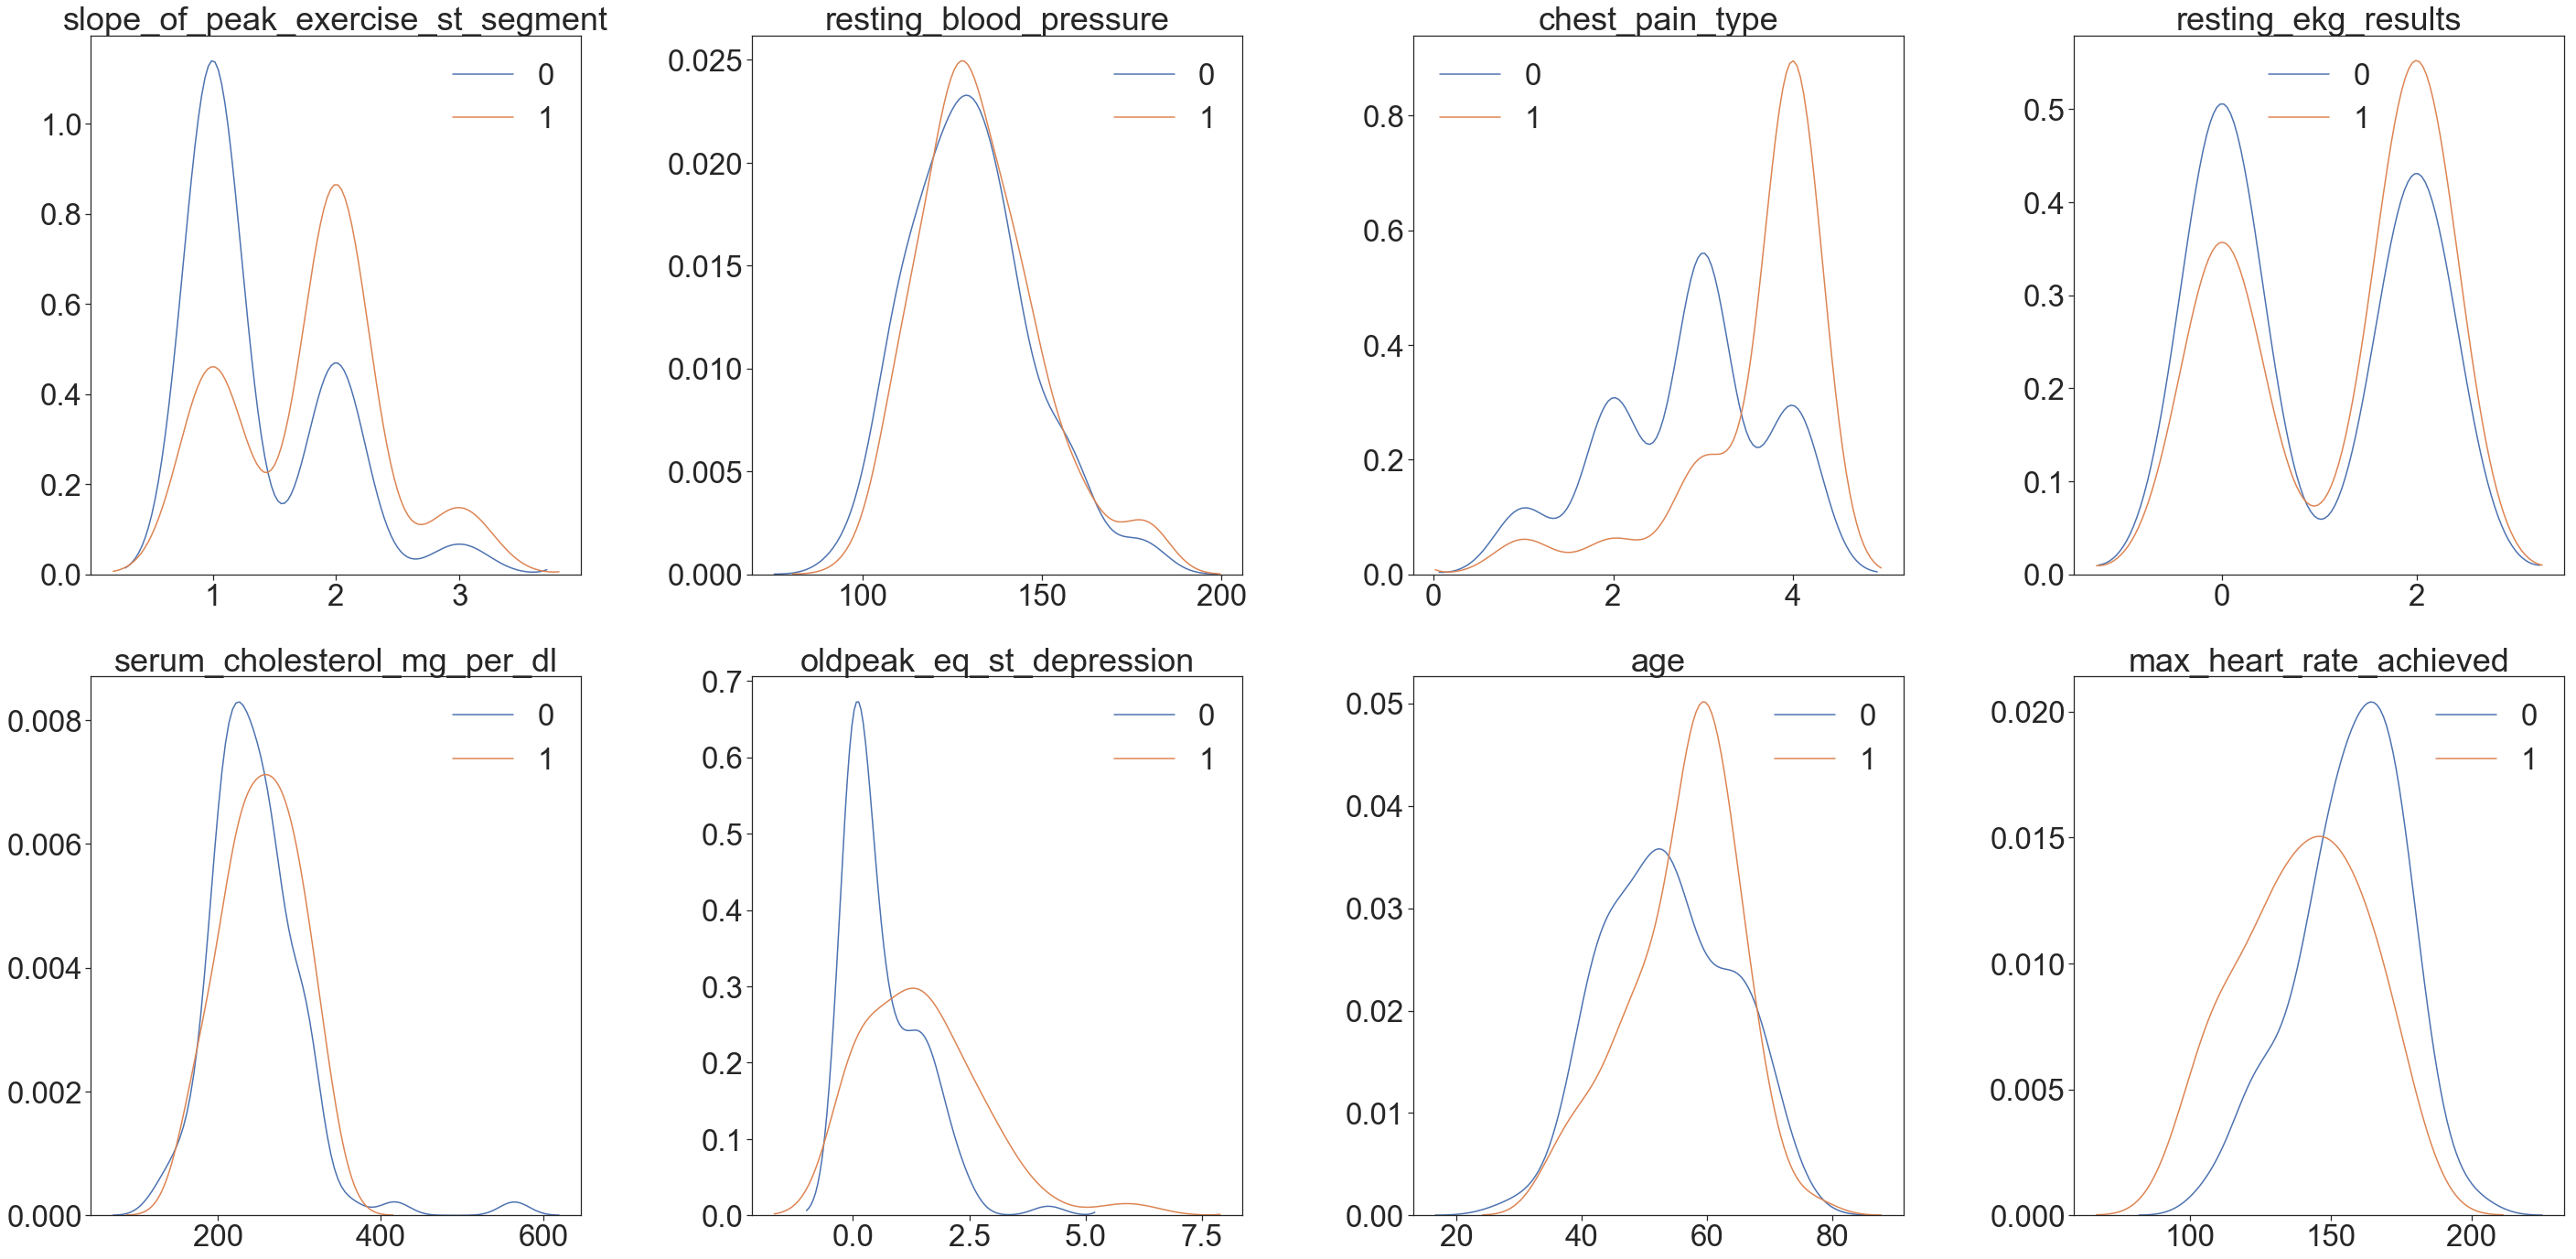

In [279]:
def compare_dist(ax, features_kde, i=0):
    for hdp in targets:
        sns.kdeplot(df_final[df_final['heart_disease_present']==hdp][features_kde], label = hdp, ax=ax)

def numeric_tile(plot_func):
    fig, axs = plt.subplots(2, 4, figsize=(40, 20))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_kde)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()
    
numeric_tile(compare_dist)

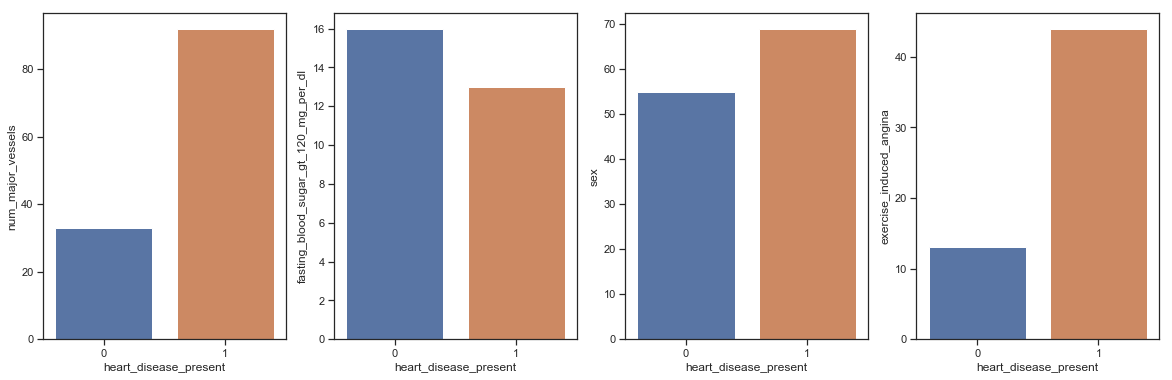

In [289]:
fig, axs = plt.subplots(figsize=(20,6),ncols=4)
for i,feature in enumerate (features_count):
    count = df_final[[feature,'heart_disease_present']].groupby('heart_disease_present').sum().reset_index()
    sns.barplot(data = count, x = 'heart_disease_present', y = feature, ax = axs[i])
    sns.set(font_scale=1) 
    sns.set_style("ticks")

treure resting_blood_preasure, slope_of_peak... i pain_type??

### dummies EDA

In [298]:
feature_dummies = ['thal_fixed_defect','thal_normal','thal_reversible_defect']

In [307]:
df_final_dummies = df_final.copy()

In [309]:
df_final_dummies.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [312]:
df_final_dummies = df_final_dummies.drop(columns = ['patient_id'])

In [315]:
df_final_dummies = pd.get_dummies(df_final_dummies)

In [318]:
features_dummies = ['thal_fixed_defect','thal_normal','thal_reversible_defect']

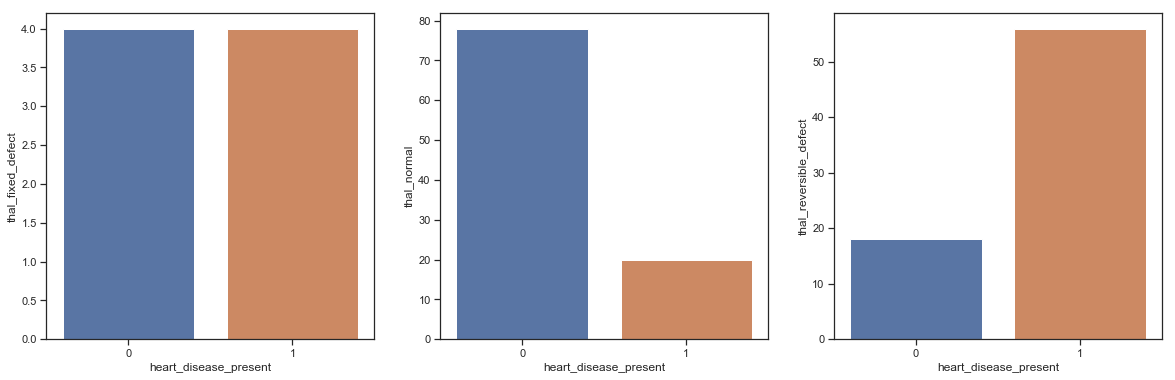

In [321]:
fig, axs = plt.subplots(figsize=(20,6),ncols=3)
for i,feature in enumerate (features_dummies):
    count = df_final_dummies[[feature,'heart_disease_present']].groupby('heart_disease_present').sum().reset_index()
    sns.barplot(data = count, x = 'heart_disease_present', y = feature, ax = axs[i])
    sns.set(font_scale=1) 
    sns.set_style("ticks")

In [316]:
df_final[['thal','heart_disease_present']].groupby('thal').mean()

,heart_disease_present
thal,
fixed_defect,0.500000
normal,0.204082
reversible_defect,0.756757


### Feature correlation

In [33]:
features_corr = df_final.select_dtypes(include=['int','float']).columns.to_list()
features_corr

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']

##### Pearson correlation

In [50]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs = pd.DataFrame(df_final[features_corr].corr()['heart_disease_present'].sort_values()).reset_index()
pcorrs = pcorrs.rename(columns = {'index':'feature', 'heart_disease_present':'pcorr'})

print('Most negatively correlated variables:')
pcorrs.head()

Most negatively correlated variables:


,feature,pcorr
0,max_heart_rate_achieved,-0.375352
1,fasting_blood_sugar_gt_120_mg_per_dl,0.003379
2,resting_blood_pressure,0.078506
3,serum_cholesterol_mg_per_dl,0.079775
4,age,0.138255


In [51]:
print('Most positively correlated variables:')
pcorrs.tail()

Most positively correlated variables:


,feature,pcorr
8,oldpeak_eq_st_depression,0.382930
9,chest_pain_type,0.412829
10,num_major_vessels,0.421519
11,exercise_induced_angina,0.448647
12,heart_disease_present,1.000000


##### Spearman correlation

In [52]:
# Compute Spearman correlation for every features
# Use only training data
from scipy.stats import spearmanr
feats = []
scorr = []
pvalues = []

for feat in features_corr:
    
    # Calculate spearman correlation
    scorr.append(spearmanr(df_final[feat], df_final['heart_disease_present']).correlation)
    pvalues.append(spearmanr(df_final[feat], df_final['heart_disease_present']).pvalue)

scorrs = pd.DataFrame({'feature': features_corr, 'scorr':scorr, 'pvalue':pvalues}).sort_values('scorr')

print('Most negatively correlated variables:')
scorrs.head()

Most negatively correlated variables:


,feature,scorr,pvalue
10,max_heart_rate_achieved,-0.363189,5.417041e-07
4,fasting_blood_sugar_gt_120_mg_per_dl,0.003379,9.640919e-01
1,resting_blood_pressure,0.071805,3.381193e-01
6,serum_cholesterol_mg_per_dl,0.127817,8.728123e-02
5,resting_ekg_results,0.145620,5.111659e-02


In [53]:
print('Most positively correlated variables:')
scorrs.tail()

Most positively correlated variables:


,feature,scorr,pvalue
7,oldpeak_eq_st_depression,0.365369,4.576916e-07
3,num_major_vessels,0.432036,1.396658e-09
11,exercise_induced_angina,0.448647,2.679484e-10
2,chest_pain_type,0.470363,2.694107e-11
12,heart_disease_present,1.000000,0.000000e+00


##### Compute features for which Pearson and Spearman correlation differs the most

In [55]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff')

,feature,pcorr,scorr,pvalue,diff
9,chest_pain_type,0.412829,0.470363,2.694107e-11,-5.753462e-02
3,serum_cholesterol_mg_per_dl,0.079775,0.127817,8.728123e-02,-4.804202e-02
7,slope_of_peak_exercise_st_segment,0.344224,0.360342,6.738074e-07,-1.611833e-02
4,age,0.138255,0.151047,4.296794e-02,-1.279257e-02
0,max_heart_rate_achieved,-0.375352,-0.363189,5.417041e-07,-1.216271e-02
10,num_major_vessels,0.421519,0.432036,1.396658e-09,-1.051770e-02
1,fasting_blood_sugar_gt_120_mg_per_dl,0.003379,0.003379,9.640919e-01,6.938894e-18
12,heart_disease_present,1.000000,1.000000,0.000000e+00,1.110223e-16
6,sex,0.335421,0.335421,4.167617e-06,2.220446e-16
11,exercise_induced_angina,0.448647,0.448647,2.679484e-10,2.220446e-16


In [64]:
features_corr

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']

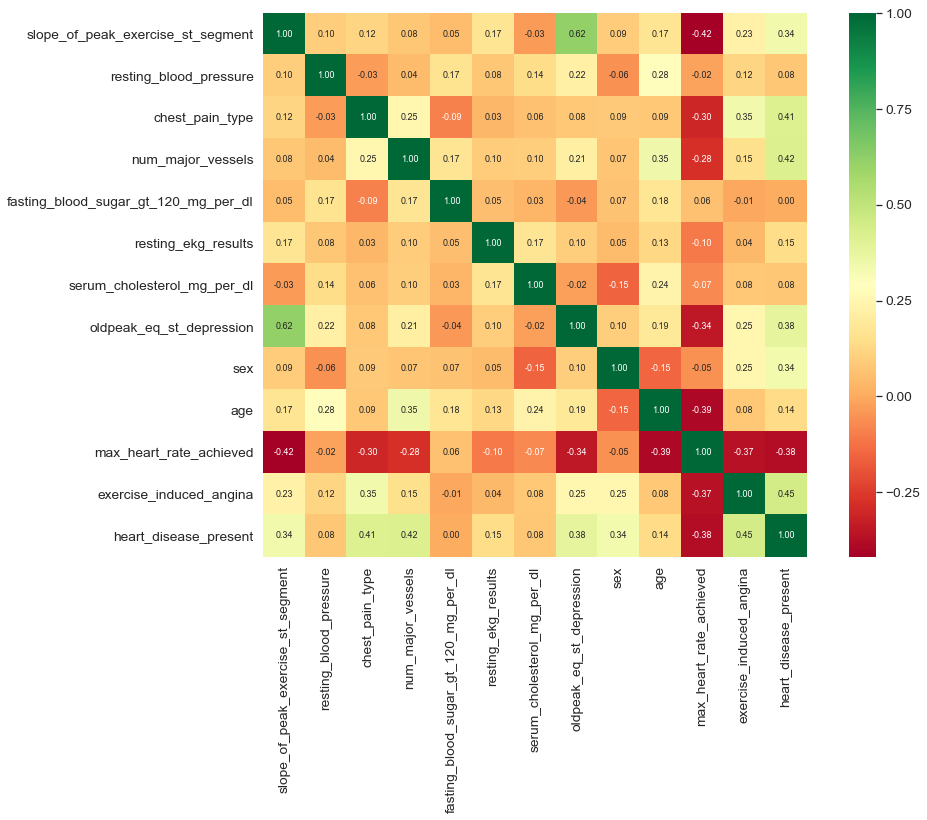

In [66]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(df_final[features_corr].corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 9},fmt='.2f')

# Model and prediction

In [293]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Since the dataset is class-balanced, we can use macro averaging for the F1 scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [294]:
# Extract training data and labels
train_set = df_final.drop(columns = ['patient_id','heart_disease_present'])
test_set = df_test.drop(columns = ['patient_id'])
test_ids = df_test['patient_id'].values
train_labels = np.asarray(df_final['heart_disease_present'])

[num_examples,num_feat] = train_set.shape

# Submission base which is used for making submissions to the competition
submission_base = df_test[['patient_id']].copy()

In [107]:
# Using stratified kfold cross validation
nfolds = 10
strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)

In [313]:
train_set = pd.get_dummies(train_set)
test_set = pd.get_dummies(test_set)

In [108]:
# Create pipeline for scaling
features = train_set.columns.tolist()
pipeline = Pipeline([('scaler', MinMaxScaler())])
# pipeline = Pipeline([('scaler', StandardScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.



In [111]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

##### Routine to train a model with cross-validation and append the results to a dataframe

In [117]:
model_results = pd.DataFrame(columns = ['model','cv_mean','cv_std'])

def run_cv_model (model, train_set, train_labels, name, model_results = None):
    
    """ Perform K-fold CV of the given model"""
    
    cv_scores = cross_val_score(model_rf, train_set, train_labels, cv = strkfold, scoring = scorer)
    
    print(f'{strkfold.n_splits}-Fold Cross validation F1 scorer = \
            {round(cv_scores.mean(), 4)} with std {round(cv_scores.std(), 4)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name,
                                                          'cv_mean':cv_scores.mean(),
                                                          'cv_std':cv_scores.std()},
                                                          index=[0]),
                                                          ignore_index = True)
    return model_results

##### Routine to plot feature importances

In [118]:
def plot_feature_importance (df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 10.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of x will show the most important features needed to reach 100*x% of cumulative importance
    
    """ 
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance']/df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    # Bar plot of n most important features
    trace0 = go.Bar(y = df.loc[:n, 'feature'],\
                   x = df.loc[:n, 'importance_normalized'],\
                   marker = dict(color = 'rgba(50, 171, 96, 0.6)',\
                                line = dict(color = 'rgba(50, 171, 96, 1.0)',\
                                           width = 1),),\
                    orientation = 'h')
    
    layout = go.Layout(title = 'Normalized importance of features',\
                      yaxis = dict(autorange = 'reversed',\
                                  tickangle = 0,\
                                  automargin = True),\
                      width = 800)
    
    fig = go.Figure(data = [trace0], layout = layout)
    
    plotly.offline.iplot(fig, filename='norm-importance')
    
    if threshold:
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Cumulative importance plot
        trace0 = go.Scatter(x = df.index,\
                           y = df['cumulative_importance'],\
                           line = dict(color = 'blue'))
        trace1 = go.Scatter(x = [importance_index + 1, importance_index + 1],\
                           y = [0, 1.02],\
                           line = dict(color = 'red',\
                                      dash = 'dash'))
        
        fig1 = go.Figure(data = [trace0, trace1])
        fig1['layout'].update(title = 'Cumulative Feature Importance',\
                             xaxis = dict(title = 'Number of Features'),\
                             yaxis = dict(title = 'Cumulative Importance'),\
                             showlegend = False)
        
        plotly.offline.iplot(fig1, filename='basic-line')
        
        print(f'{importance_index + 1} features required for {100 * threshold}% of cumulative importance.')
    
    return df    

##### Routine to plot scores of model_results

In [119]:
def plot_scores(model):
    #     model.set_index('model', inplace=True)
    
    trace0 = go.Bar(
                    y=model['cv_mean'],
                    x=model['model'],
                    marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ),
                    error_y=dict(
                            type='data',
                            array=model['cv_std'],
                            visible=True,
                            color ='black')
                    )
    
    layout = go.Layout(title='F1 scores of models',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True))

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='F1-scores')

## Random Forest baseline classifier
Use 10-fold cross validation to get prediction results

In [120]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1)
# 10 fold cross validation
model_results = run_cv_model(model_rf, train_set, train_labels, 'RF', model_results)

10-Fold Cross validation F1 scorer =             0.7941 with std 0.0954


Examine feature importances using the whole training set to fit

In [130]:
model_rf.fit(train_set, train_labels)

#Feature importance into a dataframe
feature_importance = pd.DataFrame({'feature':features, 'importance':model_rf.feature_importances_})
feature_importance.head()

,feature,importance
0,slope_of_peak_exercise_st_segment,0.043623
1,resting_blood_pressure,0.072011
2,chest_pain_type,0.119473
3,num_major_vessels,0.077388
4,fasting_blood_sugar_gt_120_mg_per_dl,0.009590


In [131]:
norm_fi = plot_feature_importance(feature_importance, threshold = 0.95)

12 feature required for 95.0% of cumulative importance.


##### Use recursive feature elimination to improve RF

In [ ]:
### ? ###

## Compare multiple models
Run several models for classification (without fine tuning) to determine a good baseline model that works for this dataset

In [170]:
model_results = pd.DataFrame(columns = ['model','cv_mean','cv_std'])

In [144]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [171]:
# Run linear SVM
model_results = run_cv_model(LinearSVC(), train_set, train_labels, 'LSVC', model_results)

10-Fold Cross validation F1 scorer =             0.7963 with std 0.076


In [172]:
# Run Random Forest Classifier
model_results = run_cv_model(RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1), train_set, train_labels, 'RF', model_results)

10-Fold Cross validation F1 scorer =             0.8014 with std 0.0855


In [173]:
# Run  Multi-layer perceptron
model_results = run_cv_model(MLPClassifier(hidden_layer_sizes = (32, 64, 128, 64, 32), max_iter = 500),
                             train_set, train_labels, 'MLP-0', model_results)

10-Fold Cross validation F1 scorer =             0.7892 with std 0.1197


In [174]:
# Run  LDA
model_results = run_cv_model(LinearDiscriminantAnalysis(), train_set, train_labels, 'LDA', model_results)

10-Fold Cross validation F1 scorer =             0.8123 with std 0.0876


In [175]:
# Run  Logistic Regression
model_results = run_cv_model(LogisticRegressionCV(), train_set, train_labels, 'LR', model_results)

10-Fold Cross validation F1 scorer =             0.7894 with std 0.0876


In [176]:
# Run  Ridge Regression
model_results = run_cv_model(RidgeClassifierCV(), train_set, train_labels, 'RR', model_results)

10-Fold Cross validation F1 scorer =             0.782 with std 0.0803


In [177]:
# Run  KNN
kn = [3, 5, 10, 20]
for n in kn:
    model_results = run_cv_model(KNeighborsClassifier(n_neighbors=n),
                                 train_set, train_labels, f'KNN-{n}', model_results)

10-Fold Cross validation F1 scorer =             0.7778 with std 0.0917
10-Fold Cross validation F1 scorer =             0.7947 with std 0.0617
10-Fold Cross validation F1 scorer =             0.7784 with std 0.0836
10-Fold Cross validation F1 scorer =             0.815 with std 0.0777


In [178]:
plot_scores(model_results)

## Analysis of best model so far

In [180]:
model_knc = KNeighborsClassifier(n_neighbors = 20)
model_knc.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [214]:
predictions = pd.DataFrame()

# Make predictions from the fold as probabilities
probabilites = model_knc.predict_proba(test_set)

# Record each prediction for each class as a separate column
for j in range(len(targets)):
    predictions[j] = probabilites[:,j]
    
# Add needed information for predictions 
predictions['patient_id'] = test_ids

# Find the class and associated probability
predictions['heart_disease_present'] = predictions[targets].idxmax(axis = 1)
predictions['confidence'] = predictions[targets].max(axis = 1)

In [215]:
predictions.head()

,0,1,patient_id,heart_disease_present,confidence
0,0.35,0.65,olalu7,1,0.65
1,1.00,0.00,z9n6mx,0,1.00
2,0.10,0.90,5k4413,1,0.90
3,1.00,0.00,mrg7q5,0,1.00
4,0.45,0.55,uki4do,1,0.55


Investigate distribution of labels in train and test

In [207]:
trace0 = go.Bar(x = targets, y = df_final['heart_disease_present'].value_counts()/num_train, name = 'train',
                marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ))
trace1 = go.Bar(x = targets, y = predictions['heart_disease_present'].value_counts()/num_test, name = 'predicted',
               marker=dict(
                        color='blue',
                        line=dict(
                            color='black',
                            width=1),
                    ))

    
layout = go.Layout(title='Label distribution in train and test (predicted)',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True),
                   yaxis = dict(title='Frequencies'))

fig = go.Figure(data=[trace0, trace1], layout=layout)
plotly.offline.iplot(fig, filename='label-dist')

##### Submission

In [219]:
submission.head()

,patient_id,heart_disease_present,confidence
0,olalu7,1,0.65
1,z9n6mx,0,1.00
2,5k4413,1,0.90
3,mrg7q5,0,1.00
4,uki4do,1,0.55


In [338]:
submission = submission_base.merge(predictions[['patient_id', 'confidence']], on = 'patient_id', how = 'left')

In [341]:
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.65
1,z9n6mx,1.00
2,5k4413,0.90
3,mrg7q5,1.00
4,uki4do,0.55


In [340]:
submission = submission.rename(columns = {'confidence':'heart_disease_present'})

In [342]:
submission.to_csv('Arnau_submission.csv',index=False)

## Validation

In [221]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_set, train_labels, test_size = 0.25, random_state = 20)

from collections import Counter

print(list(Counter(y_valid).values()))

[18, 27]


In [225]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [233]:
valid_preds = model_knc.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = targets)

preds_df['prediction'] = preds_df[targets].idxmax(axis = 1)
preds_df['confidence'] = preds_df[targets].max(axis = 1)

In [236]:
preds_df.head()

,0,1,prediction,confidence
0,0.40,0.60,1,0.60
1,0.60,0.40,0,0.60
2,0.95,0.05,0,0.95
3,0.35,0.65,1,0.65
4,0.95,0.05,0,0.95


In [235]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

F1 score: 0.83636


In [237]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

Confusion matrix, without normalization


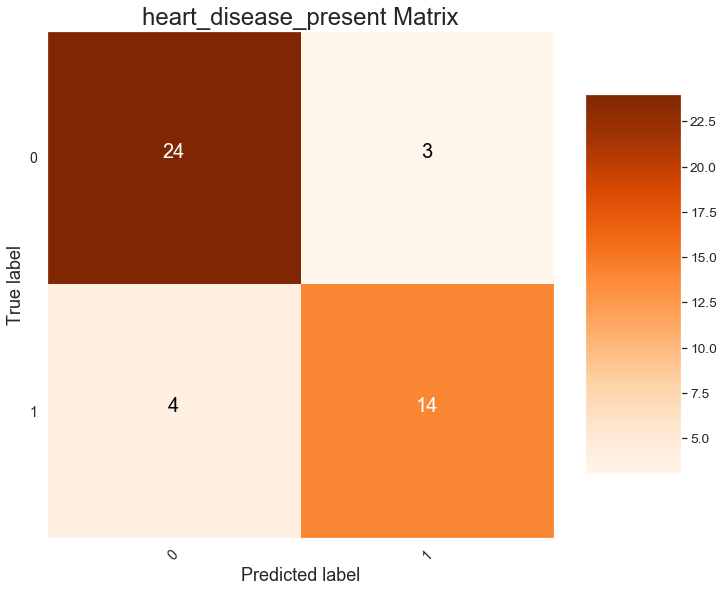

In [240]:
plot_confusion_matrix(cm, classes = targets, title = 'heart_disease_present Matrix')

Normalized confusion matrix


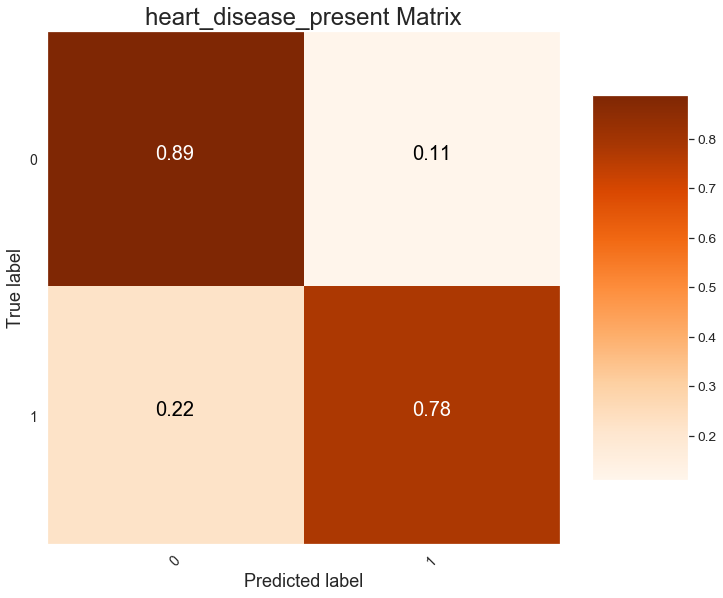

In [241]:
plot_confusion_matrix(cm, classes = targets, title = 'heart_disease_present Matrix', normalize = True)

In [251]:
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

for i in range(len(targets)):
    for j in range(len(targets)):
        if cm_norm[i,j] > 0.1 and i!=j:
            print(f'Model predicts heart disease {j} instead of heart disease {i} on {cm[i,j]} ({cm_norm[i,j]:.2}%) examples')

Model predicts heart disease 1 instead of heart disease 0 on 3 (0.11%) examples
Model predicts heart disease 0 instead of heart disease 1 on 4 (0.22%) examples
